In [33]:
# By: Adam Gregg

import numpy as np
import random as rand 
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Number of Simulations')

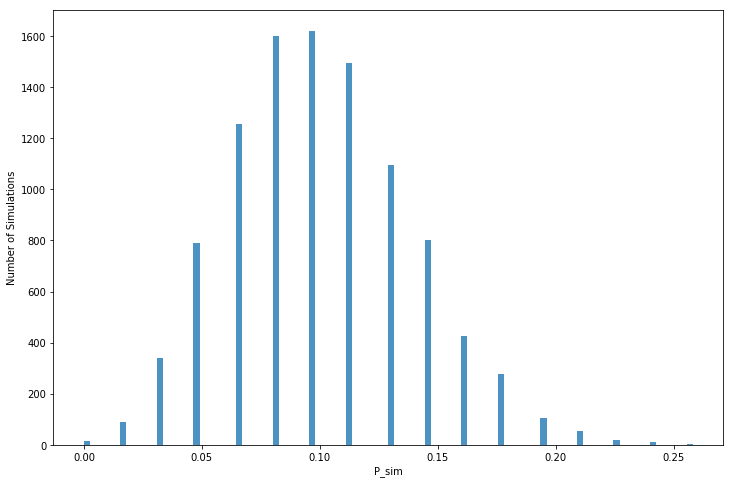

In [39]:
# 6.5.2 Generating the null distribution and p-value by simulation - OpenIntro Statistics Third Edition

# H0: There is no association between the consultant’s contributions and the clients’ complication rate. p = 0.10. 
# HA: Patients who work with the consultant tend to have a complication rate lower than 10%, i.e. p < 0.10.

# Defining the function complication_rate() which will return the proportion of patients with complications.
def complication_rate():
    count = 0
    num_of_patients = 62 
# Creating a "deck of cards" which consists of 1 red and 9 black cards (red: num = 0, black: num = 1-9).
# This will simulate the chance a patient has a complication if the true complication rate is 10% for the data.
# Then performing this 62 times (i.e. one time for each patient), we will count how many times "red" is chosen (i.e. num = 0),
# and divide that number by the total number of patients thus giving us the proportion of patients with complications.
    for i in range(num_of_patients):
        num = rand.randint(0, 9) 
        if num == 0:
            count += 1
    return count/num_of_patients

# Simulating 10,000 studies is sufficient to get a sense of the null distribution.
n_iter = 10000
# Creating an empty list to store all the simulations.
simulations = []

# Running our function complication_rate() 10,000 times and storing the results in the empty list 'simulations'. 
for i in range(n_iter):
    simulations.append(complication_rate())

# Plotting our results in the form of a histogram
plt.figure(figsize=(12,8))
plt.hist(simulations, bins = int(np.sqrt(n_iter)), alpha = 0.8)
plt.xlabel('P_sim')
plt.ylabel('Number of Simulations')

In [40]:
# Defining the true complication rate for liver donors working with this consultant.
p = 3/62
# Creating an empty list to store the results.
left_tail = []

# We will now determine how many of the proportions are equal to or less than p = 3/62.
# This represents the sample proportions under the null distribution that provide at least as much evidence as p favoring 
# the alternative hypothesis.
count = 0
for i in simulations:
    if i <= p:
        count += 1
        left_tail.append(i)

print(len(left_tail))
# We now use the number of simulated sample proportions less than or equal to p = 3/62 in order to construct the null 
# distribution’s left-tail area thus giving us the p-value.
print(len(left_tail)/10000)

1236
0.1236


Of the 10,000 simulated Psim, 1236 were smaller than or equal to p = 3/62. Since the hypothesis test is one-sided, the estimated p-value is equal to this tail area of 0.1236. Therefore, since the estimated p-value (0.1236) is larger than the signiﬁcance level (0.05), we do not reject the null hypothesis, meaning there isn’t sufficiently strong evidence to support an association between the consultant’s work and fewer surgery complications.